In [1]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [81]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=['application_date'], dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaT,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaT,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaT,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaT,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,2001-10-10,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [82]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=[2])
inspections.head()

,business_id,Score,date,type
0,10,NaN,2014-08-07,Reinspection/Followup
1,10,94.0,2014-07-29,Routine - Unscheduled
2,10,NaN,2014-01-24,Reinspection/Followup
3,10,92.0,2014-01-14,Routine - Unscheduled
4,19,94.0,2014-11-10,Routine - Unscheduled


In [83]:
inspections[inspections['business_id']==10]

,business_id,Score,date,type
0,10,NaN,2014-08-07,Reinspection/Followup
1,10,94.0,2014-07-29,Routine - Unscheduled
2,10,NaN,2014-01-24,Reinspection/Followup
3,10,92.0,2014-01-14,Routine - Unscheduled


In [84]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=[1])
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,2014-01-14,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,2014-01-14,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,2014-01-14,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,2014-07-29,103129,Moderate Risk,Insufficient hot water or running water
4,10,2014-07-29,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [85]:
violations[violations['business_id'] == 10]

,business_id,date,ViolationTypeID,risk_category,description
0,10,2014-01-14,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,2014-01-14,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,2014-01-14,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,2014-07-29,103129,Moderate Risk,Insufficient hot water or running water
4,10,2014-07-29,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [86]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
from pandas import merge
fullData = merge(businesses, inspections, how='inner', on='business_id')
fullData = merge(fullData, violations, how = 'inner', on = ('business_id','date'))

In [89]:
# 2 Which ten business have had the most inspections?

In [90]:
fullData.business_id.value_counts()[0:10]
#fullData.groupby('business_id').business_id.count()

10238    64
75139    63
71385    58
77693    58
2945     57
3151     54
63082    52
1458     50
64176    48
70996    48
Name: business_id, dtype: int64

In [91]:
# 3 Group and count the inspections by type
fullData.groupby('type').type.count()

type
Complaint                           2004
Complaint Reinspection/Followup       12
Foodborne Illness Investigation      188
New Construction                      45
New Ownership                       1120
Non-inspection site visit            208
Reinspection/Followup               1170
Routine - Scheduled                   60
Routine - Unscheduled              38905
Structural Inspection                 41
Name: type, dtype: int64

In [102]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

#Firstly, get the month and year
fullData['month'] = fullData.date.map(lambda x: x.month)
#Alternatively, just look at the month
#type(fullData.date[1])
fullData['yearMonth'] = fullData.date.map(lambda x: x.strftime('%Y-%m'))


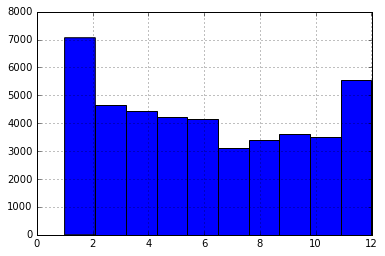

In [118]:
import matplotlib.pyplot as plt
#%matplotlib inline 
fullData.month.hist()

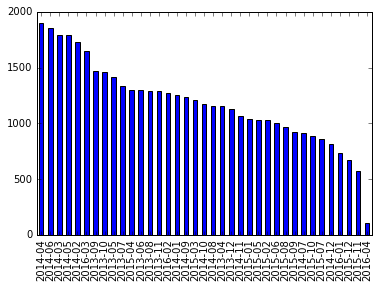

In [119]:
fullData.yearMonth.value_counts().plot(kind='bar')

In [173]:
# 5 Which zip code contains the most high risk violations?
fullData[fullData.risk_category == 'High Risk'].groupby('postal_code').risk_category.count().sort_values()[[-1]]

postal_code
94133    618
Name: risk_category, dtype: int64

In [180]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?
fullData.type.unique()
fullData[fullData.type == 'New Ownership'].groupby('risk_category').risk_category.count().sort_values()

risk_category
High Risk        148
Moderate Risk    419
Low Risk         553
Name: risk_category, dtype: int64

In [181]:
fullData[fullData.type != 'New Ownership'].groupby('risk_category').risk_category.count().sort_values()

risk_category
High Risk         6113
Moderate Risk    14371
Low Risk         22137
Name: risk_category, dtype: int64

In [191]:
# 7 Examining the descriptions, what is the most common violation?
fullData.groupby('description').description.count().sort_values()[[-1]]

description
Unclean or degraded floors walls or ceilings    3746
Name: description, dtype: int64

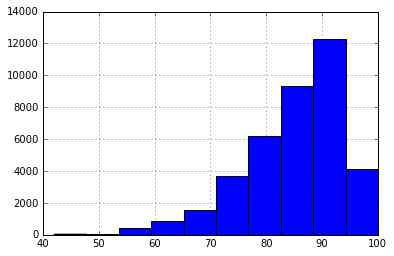

In [196]:
# 8 Create a hist of the scores with 10 bins
fullData.Score.hist(bins=10)

In [ ]:
# 9 Can you predict risk category based on the other features in this dataset?

In [ ]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [ ]:
############################
### A Little More Morbid ###
############################

In [211]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [212]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns = {'lawenforcementagency':'agency', 'raceethnicity':'race'}, inplace=True)
killings.columns

Index([u'Unnamed: 0', u'name', u'age', u'gender', u'race', u'month', u'day',
       u'year', u'streetaddress', u'city', u'state', u'agency', u'cause',
       u'armed', u'county_income'],
      dtype='object')

In [213]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [215]:
# 3. replace each null value in the dataframe with the string "Unknown"
#ufo.Colors.fillna(value='Unknown', inplace=True) # Permanent
killings.streetaddress.fillna(value='Unknown', inplace=True) 

In [220]:
# 4. How many killings were there so far in 2015?
len(killings[killings['year']==2015].index)

467

In [225]:
# 5. Of all killings, how many were male and how many female?
killings.groupby('gender').gender.value_counts()

gender  gender
Female  Female     22
Male    Male      445
Name: gender, dtype: int64

In [228]:
# 6. How many killings were of unarmed people?
len(killings[killings['armed']=='No'].index)

102

In [235]:
# 7. What percentage of all killings were unarmed?
len(killings[killings['armed']=='No'].index)/float(len(killings.index))

0.21841541755888652

In [240]:
# 8. What are the 5 states with the most killings?
killings.groupby('city').city.count().sort_values().tail()

city
Indianapolis     4
Oklahoma City    4
Houston          6
Phoenix          6
Los Angeles      9
Name: city, dtype: int64

In [241]:
# 9. Show a value counts of deaths for each race
killings.groupby('race').race.value_counts()

race                    race                  
Asian/Pacific Islander  Asian/Pacific Islander     10
Black                   Black                     135
Hispanic/Latino         Hispanic/Latino            67
Native American         Native American             4
Unknown                 Unknown                    15
White                   White                     236
Name: race, dtype: int64

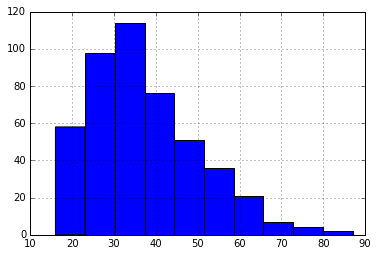

In [242]:
# 10. Display a histogram of ages of all killings
killings.age.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12550dcd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1258ed450>]], dtype=object)

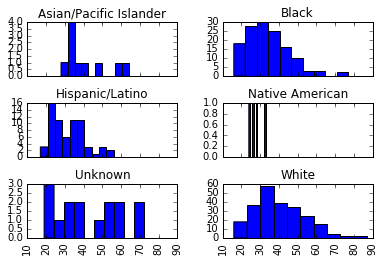

In [245]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race, sharex = True, sharey = False)

In [246]:
# 12. What is the average age of death by race?
killings.groupby('race').age.apply(lambda x: x.mean())

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

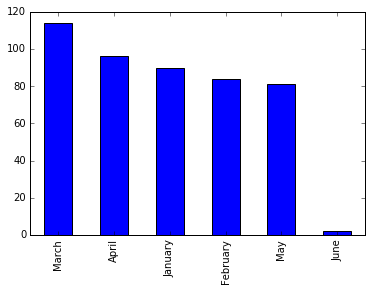

In [249]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot(kind='bar')

In [ ]:
###################
### Less Morbid ###
###################

In [250]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [265]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.drop(['Employed_full_time_year_round','Major_code'], axis=1, inplace = True)

In [269]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [305]:
# 3. What are the top 10 highest paying majors?
majors[['Major','P75th']].sort_values(by='P75th',ascending=False).head(10)

,Major,P75th
59,PETROLEUM ENGINEERING,210000.0
97,MATHEMATICS AND COMPUTER SCIENCE,136000.0
58,NUCLEAR ENGINEERING,128000.0
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,125000.0
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,125000.0
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,125000.0
56,MINING AND MINERAL ENGINEERING,124000.0
55,METALLURGICAL ENGINEERING,123000.0
45,CHEMICAL ENGINEERING,120000.0
48,ELECTRICAL ENGINEERING,116000.0


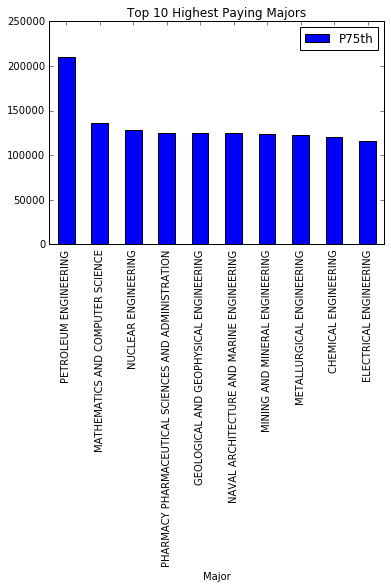

In [304]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors[['Major','P75th']].sort_values(by='P75th',ascending=False).head(10).plot(kind='bar',title='Top 10 Highest Paying Majors',x='Major',y='P75th')

In [293]:
# 5. What is the average median salary for each major category?
majors[['Major_category','Median']].groupby('Major_category').Median.apply(lambda x: x.mean())

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [ ]:
# 6. Show only the top 5 paying major categories


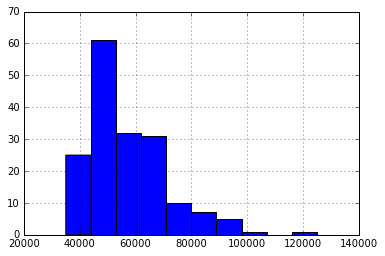

In [295]:
# 7. Plot a histogram of the distribution of median salaries
majors.Median.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c4c8450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12e421c90>]], dtype=object)

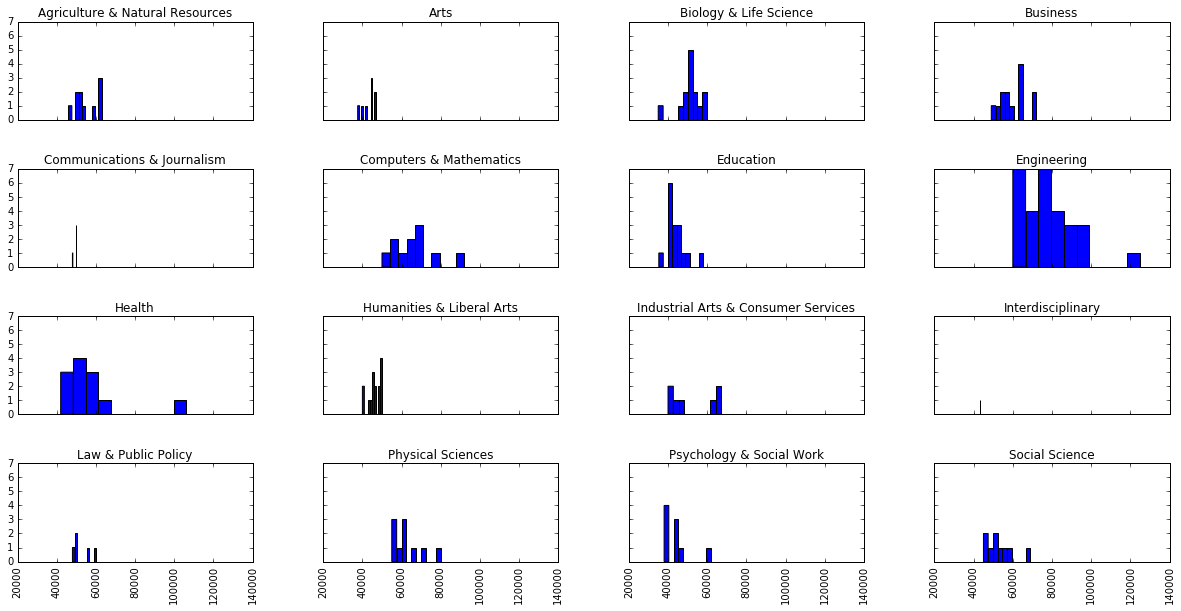

In [299]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors.Median.hist(by=majors.Major_category,sharex=True, sharey=True,figsize=(20,10))

In [303]:
# 9. What are the top 10 most UNemployed majors?
majors[['Major','Unemployment_rate']].sort_values(by='Unemployment_rate',ascending=False).head(10)

,Major,Unemployment_rate
146,MISCELLANEOUS FINE ARTS,0.156147
116,CLINICAL PSYCHOLOGY,0.102712
93,MILITARY TECHNOLOGIES,0.101796
27,SCHOOL STUDENT COUNSELING,0.101746
77,LIBRARY SCIENCE,0.094843
141,VISUAL AND PERFORMING ARTS,0.094658
19,COMPUTER PROGRAMMING AND DATA PROCESSING,0.090264
119,SOCIAL PSYCHOLOGY,0.087336
104,ASTRONOMY AND ASTROPHYSICS,0.086022
11,ARCHITECTURE,0.085991


In [308]:
# What are the unemployment rates?
majors[['Unemployment_rate']].head()

,Unemployment_rate
0,0.026147
1,0.028636
2,0.030248
3,0.042679
4,0.049188


In [315]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
majors[['Major_category','Unemployment_rate']].groupby('Major_category').Unemployment_rate.apply(lambda x: x.mean()).sort_values(ascending=False).head(10)

Major_category
Arts                                   0.087601
Psychology & Social Work               0.077867
Interdisciplinary                      0.077269
Humanities & Liberal Arts              0.069429
Communications & Journalism            0.069125
Law & Public Policy                    0.067854
Social Science                         0.065686
Computers & Mathematics                0.059437
Industrial Arts & Consumer Services    0.058546
Physical Sciences                      0.054541
Name: Unemployment_rate, dtype: float64

In [319]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate'] = majors['Employed']/majors['Total']


In [321]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployment_rate']=1-majors['sample_employment_rate']

In [322]:
majors.columns

Index([u'Unnamed: 0', u'Major', u'Major_category', u'Total', u'Employed',
       u'Unemployed', u'Unemployment_rate', u'Median', u'P25th', u'P75th',
       u'sample_employment_rate', u'sample_unemployment_rate'],
      dtype='object')

In [323]:
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
